# Building a decision tree classifier to predict whether a customer will purchase a product or service
>Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

                
## Data Dictionary

    Variable Name	    Role	  Type	        Demographic	          Description  

          age	    Feature	  Integer      	Age			             
          
          job	    Feature	  Categorical	Occupation	              type of job   
          
      marital	    Feature	  Categorical	Marital Status	          marital status   
      
    education	    Feature	  Categorical	Education                 Level  
    
      default	    Feature	  Binary		has credit in default?		  
      
      balance	    Feature	  Integer		average yearly            balance  
      
      housing	    Feature	  Binary		has housing loan?		           
      
         loan	    Feature	  Binary		has personal loan?		  
         
      contact	    Feature	  Categorical	contact                   communication type   
      
      day_of_week   Feature	   Date		    last contact day of the week		
  
        month	    Feature	   Date		    last contact month of year  
        
     duration	    Feature	  Integer		last contact duration, in seconds (numeric).  
     
     campaign	    Feature	  Integer		number of contacts performed during this campaign and for this client   
     
        pdays	    Feature	  Integer		number of days that passed by after the client was last contacted 
        
     previous	    Feature   Integer		number of contacts performed before this campaign and for this client  
     
     poutcome	    Feature	  Categorical	outcome of the previous marketing campaign 	           
     
            y       Target	  Binary		has the client subscribed a term deposit?  
            

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score, classification_report

In [2]:
# Importing data
df = pd.read_csv('datasets/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Checking for non numerical data
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

age
balance
day
duration
campaign
pdays
previous


In [5]:
# Checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Checking for class imbalance
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## Converting non-numeric data into categorical


In [7]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes + 1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  y          45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,1,2143,2,1,3,5,9,261,1,-1,0,4,1
1,44,10,3,2,1,29,2,1,3,5,9,151,1,-1,0,4,1
2,33,3,2,2,1,2,2,2,3,5,9,76,1,-1,0,4,1
3,47,2,2,4,1,1506,2,1,3,5,9,92,1,-1,0,4,1
4,33,12,3,4,1,1,1,1,3,5,9,198,1,-1,0,4,1


## Checking for class imbalance

In [10]:
df.y.value_counts()


y
1    39922
2     5289
Name: count, dtype: int64

<BarContainer object of 2 artists>

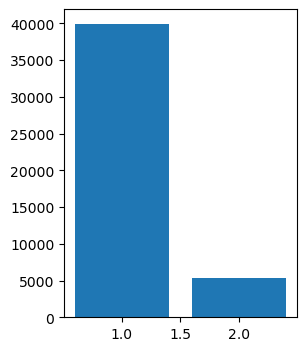

In [11]:
fig, ax = plt.subplots(figsize = (3, 4))
ax.bar([1,2], df.y.value_counts())

## Splitting data into train test

In [12]:
X, y = df.drop('y', axis = 1), df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Handling class imbalance through oversampling using SMOTE

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 


Before OverSampling, counts of label '1': 31915
Before OverSampling, counts of label '2': 4253 

After OverSampling, the shape of train_X: (63830, 16)
After OverSampling, the shape of train_y: (63830,) 

After OverSampling, counts of label '1': 31915
After OverSampling, counts of label '2': 31915


In [14]:
# pip install imblearn

## Modelling

In [15]:
model_smote = RandomForestClassifier(n_jobs = -1, random_state = 42)
model_smote.fit(X_train_res, y_train_res)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
model_smote.score(X_test, y_test)

0.8827822625234988

In [17]:
y_pred = model_smote.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.91      0.93      8007
           2       0.49      0.64      0.55      1036

    accuracy                           0.88      9043
   macro avg       0.72      0.78      0.74      9043
weighted avg       0.90      0.88      0.89      9043



## Handling class imbalance through down-sampling using NearMiss()

In [19]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '2': {} \n".format(sum(y_train == 2))) 

# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '2': {}".format(sum(y_train_miss == 2))) 


Before Undersampling, counts of label '1': 31915
Before Undersampling, counts of label '2': 4253 

After Undersampling, the shape of train_X: (8506, 16)
After Undersampling, the shape of train_y: (8506,) 

After Undersampling, counts of label '1': 4253
After Undersampling, counts of label '2': 4253


In [20]:
model_near_miss = RandomForestClassifier(n_jobs = -1, random_state = 42)
model_near_miss.fit(X_train_miss, y_train_miss)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [22]:
model_near_miss.score(X_test, y_test)

0.5090124958531461

In [23]:
y_preds = model_near_miss.predict(X_test)

In [24]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.97      0.46      0.62      8007
           2       0.18      0.90      0.30      1036

    accuracy                           0.51      9043
   macro avg       0.58      0.68      0.46      9043
weighted avg       0.88      0.51      0.59      9043



> Note: Since it can been seen that downsampling can't help much in this case, we shall proceed with SMOTE

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[7322,  685],
       [ 375,  661]], dtype=int64)

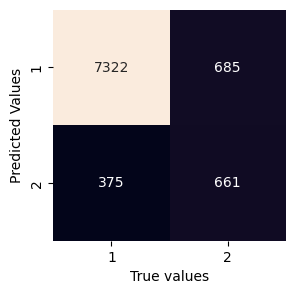

In [43]:
fig, ax = plt.subplots(figsize = (3, 3))
ax = sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'g', xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel('True values')
plt.ylabel("Predicted Values");

## Hyperparameters Tuning

In [27]:
%%time
# Hyperparameter tuning for RandomForestClassifier using RandomizesSearchCV

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(2, 20, 2)
          }
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs = 1, random_state = 42),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True
                          )
rs_rf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 1h 6min 21s
Wall time: 2h 18min 33s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
# Checking the best parameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': None}

In [32]:
# Oversampling the test cases
X_test_res, y_test_res = SMOTE().fit_resample(X_test, y_test.ravel())

In [37]:
# Modelling on the best parameters
best_model = RandomForestClassifier(n_jobs = -1,
                                   random_state = 42,
                                   n_estimators = 720,
                                   min_samples_split = 6,
                                   min_samples_leaf = 2,
                                   max_depth = None)

best_model.fit(X_train_res, y_train_res)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=6,
                       n_estimators=720, n_jobs=-1, random_state=42)

## Evaluation

In [38]:
best_model.score(X_test_res, y_test_res)

0.8934682153116024

In [39]:
y_pred_best = best_model.predict(X_test_res)

In [40]:
print(classification_report(y_test_res, y_pred_best))

              precision    recall  f1-score   support

           1       0.88      0.91      0.89      8007
           2       0.90      0.88      0.89      8007

    accuracy                           0.89     16014
   macro avg       0.89      0.89      0.89     16014
weighted avg       0.89      0.89      0.89     16014



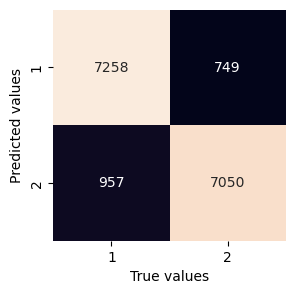

In [45]:
conf_mat_best = confusion_matrix(y_test_res, y_pred_best)
fig, ax = plt.subplots(figsize = (3,3))
ax = sns.heatmap(conf_mat_best, annot = True, cbar = False, fmt = 'g', xticklabels = [1, 2], yticklabels=[1,2])
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()